# "Sklearn: Classification with pipelines and GridSearch"


- title: "Sklearn: Classification with pipelines and GridSearch"
- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [sklearn, pandas, seaborn, classification, pipelines, gridsearch, python]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_wine

In [3]:
data = load_wine()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


# Define Features and Target

In [7]:
X = data.data

y = data.target

# Train Test Split 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

# Scale Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Explore Data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [12]:
df.skew()

alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
dtype: float64

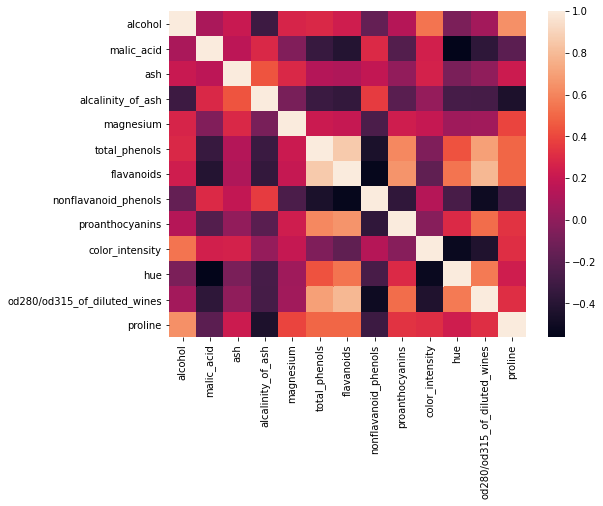

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr());

In [14]:
df.corr().iloc[:,1].sort_values(ascending=False)

malic_acid                      1.000000
nonflavanoid_phenols            0.292977
alcalinity_of_ash               0.288500
color_intensity                 0.248985
ash                             0.164045
alcohol                         0.094397
magnesium                      -0.054575
proline                        -0.192011
proanthocyanins                -0.220746
total_phenols                  -0.335167
od280/od315_of_diluted_wines   -0.368710
flavanoids                     -0.411007
hue                            -0.561296
Name: malic_acid, dtype: float64

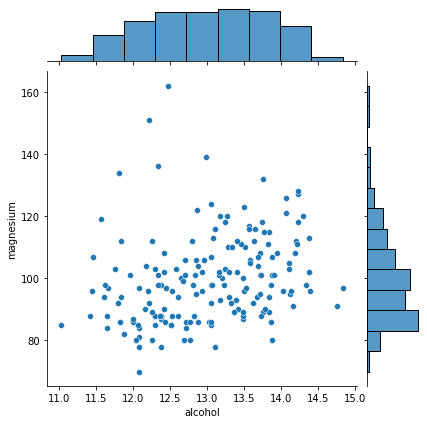

In [15]:
sns.jointplot(x='alcohol', y='magnesium', data=df);

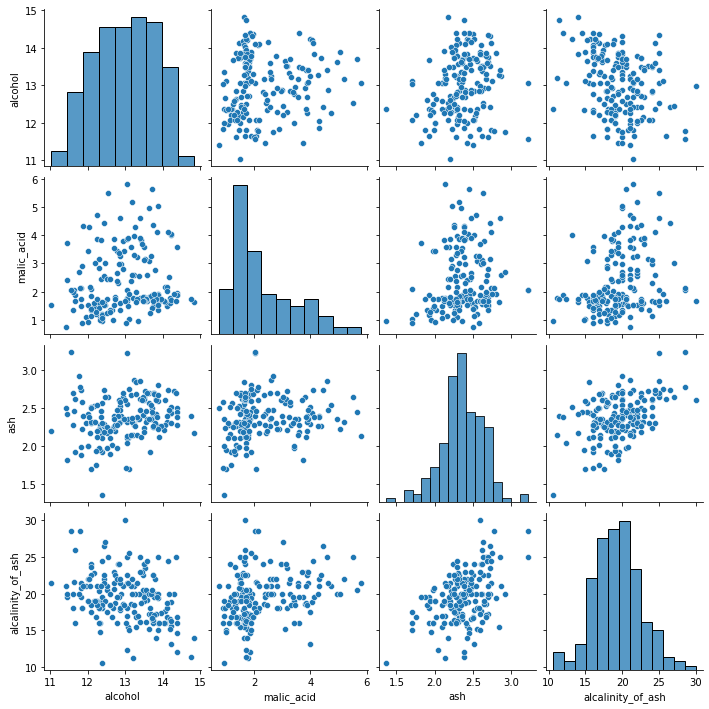

In [16]:
sns.pairplot(df.iloc[:,0:4]);

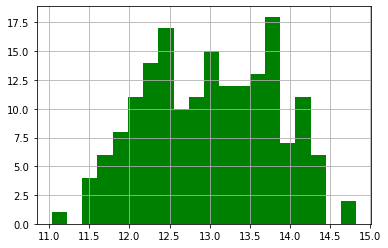

In [17]:
df['alcohol'].hist(bins=20, color='green');

<Figure size 576x432 with 0 Axes>

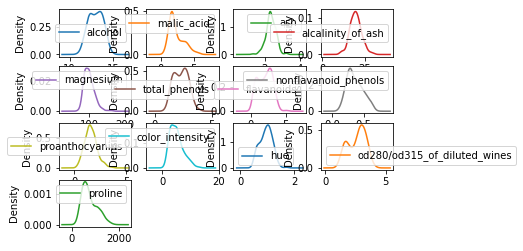

In [18]:
plt.figure(figsize=(8,6))
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False);

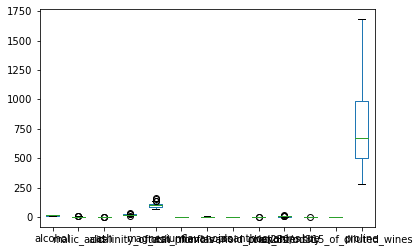

In [19]:
df.plot(kind='box', sharex=False, sharey=False, fontsize=10);

# Spot check algorithms 

In [20]:
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
# Build models 

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('eAB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('MLPC', MLPClassifier()))
models.append(('eET', ExtraTreesClassifier()))
models.append(('eGBM', GradientBoostingClassifier())) 
models.append(('eRF', RandomForestClassifier())) 

In [22]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=20, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    report_message = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(report_message)

LR: 0.978571 (0.051010)
LDA: 0.971429 (0.057143)
KNN: 0.950893 (0.080827)
CART: 0.928571 (0.105946)
NB: 0.957143 (0.079539)
SVM: 0.985714 (0.042857)
eAB: 0.874107 (0.116479)
XGB: 0.958036 (0.078505)
MLPC: 0.971429 (0.057143)
eET: 0.978571 (0.068139)
eGBM: 0.929464 (0.114686)
eRF: 0.964286 (0.076599)


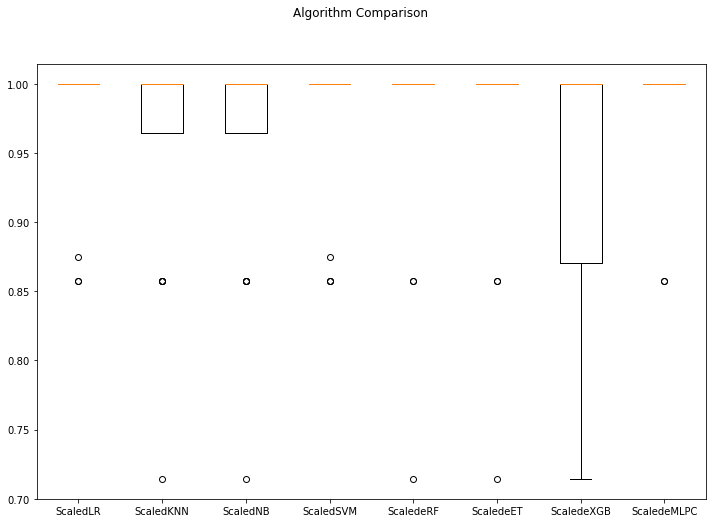

In [47]:
# Compare Algorithms
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
# Use Pipelines to standardise and Standardize dataset 

    
scaler = StandardScaler()

pipelines = []
pipelines.append(('ScaledLR',    Pipeline(  [('Scaler', StandardScaler()),('LR',   LogisticRegression())]  )))
pipelines.append(('ScaledKNN',   Pipeline(  [('Scaler', StandardScaler()),('KNN',  KNeighborsClassifier())]  )))
pipelines.append(('ScaledNB',    Pipeline(  [('Scaler', StandardScaler()),('NB',   GaussianNB())]  )))
pipelines.append(('ScaledSVM',   Pipeline(  [('Scaler', StandardScaler()),('SVM',  SVC())]  )))
pipelines.append(('ScaledeRF',   Pipeline(  [('Scaler', StandardScaler()),('eRF',  RandomForestClassifier())]  )))
pipelines.append(('ScaledeET',   Pipeline(  [('Scaler', StandardScaler()),('eET',  ExtraTreesClassifier())]  )))
pipelines.append(('ScaledeXGB',  Pipeline(  [('Scaler', StandardScaler()),('XGB',  XGBClassifier())]  )))
pipelines.append(('ScaledeMLPC', Pipeline(  [('Scaler', StandardScaler()),('MLPC', MLPClassifier())]  )))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=20, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    report_message = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(report_message)

ScaledLR: 0.979464 (0.048993)
ScaledKNN: 0.957143 (0.079539)
ScaledNB: 0.957143 (0.079539)
ScaledSVM: 0.972321 (0.055465)
ScaledeRF: 0.971429 (0.072843)
ScaledeET: 0.971429 (0.072843)
ScaledeXGB: 0.950893 (0.080827)
ScaledeMLPC: 0.985714 (0.042857)


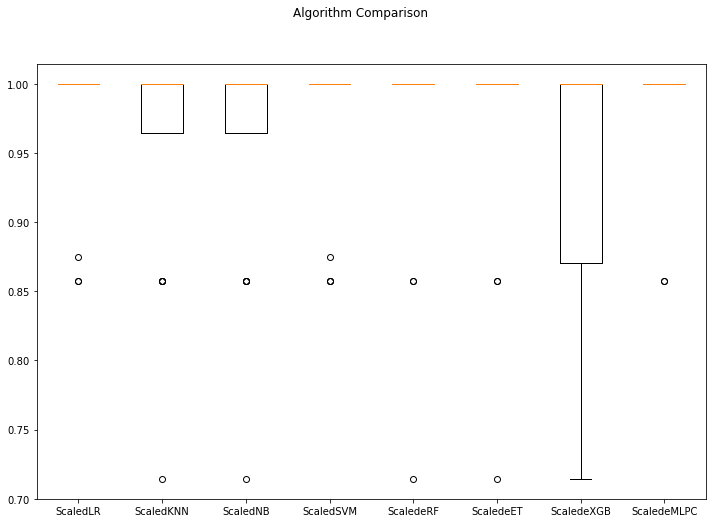

In [46]:
# Compare Algorithms
rcParams['figure.figsize'] = 12, 8
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [48]:
# Tuning scaled XGB

from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

    
param_grid = {  'min_child_weight': [1, 5, 10],
                'gamma': [1.5, 2],
                'subsample': [0.5, 0.6, 0.7],
                'max_depth': [5, 6],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'n_estimators': [175,200,225]}


model = XGBClassifier()
kfold = KFold(n_splits=5, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.979064 using {'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 175, 'subsample': 0.5}
0.971921 (0.014050) with: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 175, 'subsample': 0.5}
0.971675 (0.026665) with: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 175, 'subsample': 0.6}
0.971675 (0.026665) with: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 175, 'subsample': 0.7}
0.971921 (0.014050) with: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.5}
0.971675 (0.026665) with: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6}
0.971675 (0.026665) with: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.

In [49]:
grid_result.best_score_

0.9790640394088671

In [50]:
grid_result.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 175,
 'subsample': 0.5}

In [51]:
model = XGBClassifier(colsample_bytree=0.8, gamma= 1.5, max_depth=5, 
                      min_child_weigth=5, n_estimators=175, subsample=0.5)

In [52]:
model.fit(X_train, y_train)


[19:05:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { min_child_weigth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_child_weigth=5, missing=nan,
              monotone_constraints='()', n_estimators=175, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
predictions = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [55]:
confusion_matrix(y_test, predictions)

array([[14,  0,  0],
       [ 1, 13,  0],
       [ 0,  0,  8]])